In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
X.shape, y.shape

((150, 4), (150,))

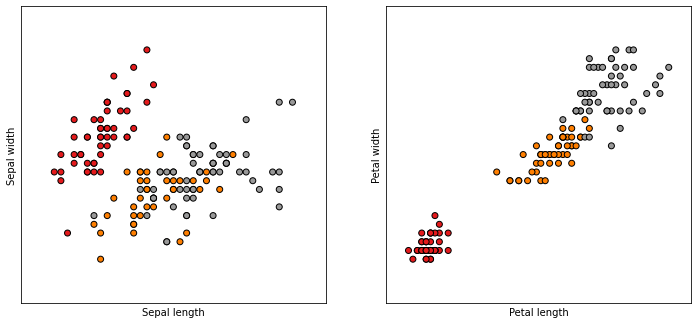

In [ ]:
plt.figure(1, figsize=(12, 12))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
ax1=plt.subplot(221)
# Plot the training points
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

ax2=plt.subplot(222)
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

# Plot the training points
ax2.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xticks(())
ax2.set_yticks(())

plt.show()

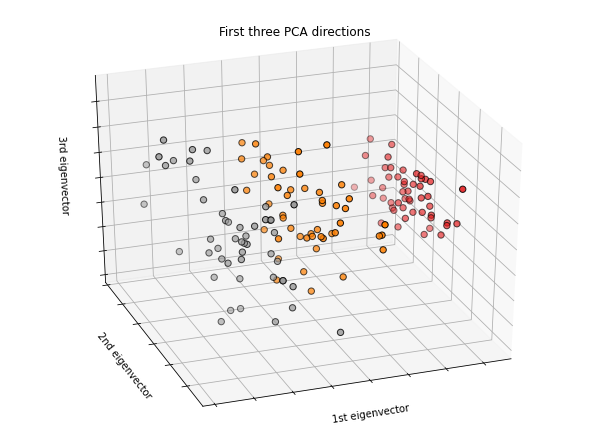

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
y=np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=5,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
23/23 [==============================] - 0s 8ms/step - loss: 0.5924 - accuracy: 0.6071 - val_loss: 0.5909 - val_accuracy: 0.6316
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5836 - accuracy: 0.6250 - val_loss: 0.5830 - val_accuracy: 0.6316
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5784 - accuracy: 0.6250 - val_loss: 0.5760 - val_accuracy: 0.6316
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5685 - accuracy: 0.6607 - val_loss: 0.5684 - val_accuracy: 0.6579
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5642 - accuracy: 0.6250 - val_loss: 0.5636 - val_accuracy: 0.6579
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.6250 - val_loss: 0.5569 - val_accuracy: 0.6316
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5490 - accuracy: 0.6429 - val_loss: 0.5517 - val_accuracy: 0.6579
Epoch 8/50
23/23 [==

In [ ]:
results=pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.592393,0.607143,0.590867,0.631579
1,0.583639,0.625000,0.583037,0.631579
2,0.578448,0.625000,0.576006,0.631579
3,0.568501,0.660714,0.568447,0.657895
4,0.564213,0.625000,0.563579,0.657895
5,0.554607,0.625000,0.556903,0.631579
6,0.549005,0.642857,0.551722,0.657895
7,0.542294,0.687500,0.545210,0.789474
8,0.535185,0.705357,0.540194,0.657895
9,0.532711,0.651786,0.537856,0.631579


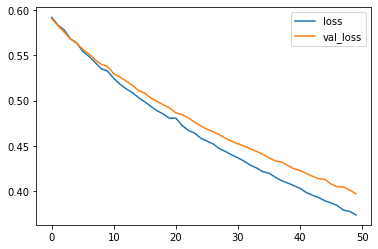

In [ ]:
%matplotlib inline
results[['loss','val_loss']].plot()

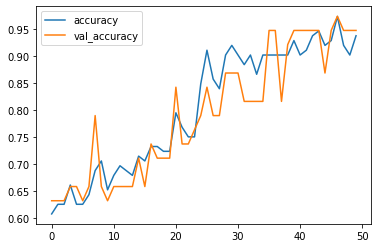

In [ ]:
results[['accuracy','val_accuracy']].plot()